# Testing Variability Effect on the Optimal PPA Policy

How should we incorporate variance information into our estimations of future demand, at different levels of $\alpha$?

In [1]:
import sys
import random

# add library to path (or else, src not visible)
sys.path.insert(0, "../../")

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.AllocationSolver import AllocationSolver
from src.dists import SymmetricDiscreteDistribution, Distribution, UniformDistribution, NormalDistribution, ParetoDistribution
from src.plots import plot_alpha_versus_lambda, plot_Z_versus_lambda
from src.random_problem import generate_random_problem, generate_normal_distribution, generate_pareto_distribution

# use seaborn style plotting for poster presentation
sns.set_context("talk")
sns.set_style("whitegrid")

## Attempt 1: Learn $\lambda$ for 2 nodes

In [2]:
prob = AllocationSolver(
    [
        NormalDistribution(15, 6, 5),
        NormalDistribution(5, 2, 5),
        NormalDistribution(10, 4, 5),
    ],
    initial_supply=30,
    alloc_step=0.05,
    alpha=1,
    allocation_method="lambda"
)

In [3]:
prob.change_allocation_method = "lambda_time"
prob.change_alpha(2)

Optimality gap for best lambda: 8.41957152629691e-05


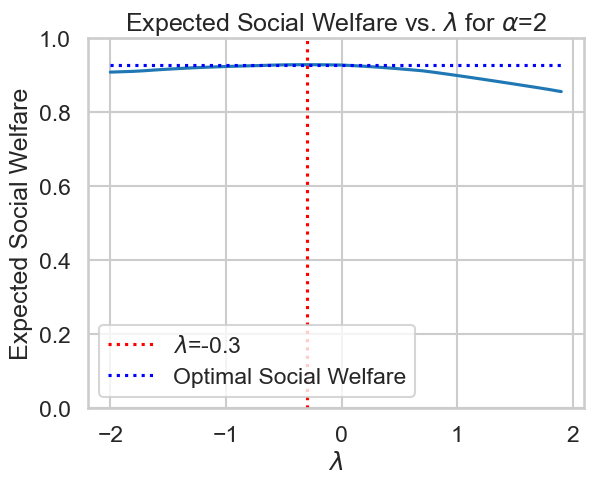

In [4]:
plot_Z_versus_lambda(prob, 0.1, 1)
# plot_best_lambda_versus(prob, 0.1, 1)

In [5]:
prob.change_alpha(1)

In [6]:
# plot_Z_versus_lambda(prob, 0.1, 1)
# plot_best_lambda_versus_s(prob, 0.025, 1)

In [7]:
# prob.change_alpha(np.inf)

In [8]:
# plot_Z_versus_lambda(prob, 0.1, 1)
# plot_best_lambda_versus_s(prob, 0.025, 1)

## Experiment 2: Setting $\lambda$ to be exact

Assume normally distributed demand (approximate with discrete support). Try learning individual $\lambda$, that updates the expected future demand in the the PPA policy:
$$ \frac{d_i}{d_i+\sum_{j=i+1}^N (E[D_j]+\lambda\sigma_j)}s $$

In [9]:
prob.change_initial_supply(30)
prob.change_alpha(0)

In [10]:
# plot_Z_versus_three_node_lambda(prob, 0.1, compare_opt=True)

In [11]:
prob.change_alpha(1)

In [12]:
# plot_Z_versus_three_node_lambda(prob, 0.1, compare_opt=True)

In [13]:
prob.change_alpha(np.inf)

In [14]:
# plot_Z_versus_three_node_lambda(prob, 0.1, compare_opt=True)

## Experiment 3: Finding a relationship between $\lambda$ and $\alpha$

We graph the relationship between $\lambda$ and $\alpha$ for 25 instances of 4 agents with Gaussian demand, 5 support points, randomly drawn means from [10, 100], and coefficient of variation 0.4. Set the initial supply equal to the expected demand.

In [15]:
# random.seed(0)
# np.random.seed(0)

# prob_generator = lambda: generate_random_problem(4, generate_normal_distribution((10, 100), 0.4, 5))

# plot_alpha_versus_lambda(prob_generator, 100, tol=0.01, monte_carlo=False)